In [2]:
import requests
import pandas as pd

In [3]:
with open('alpha_vantage_apikey.txt', 'r') as file:
    apikey = file.read()

In [4]:
base_url = 'https://www.alphavantage.co/query?'

In [16]:
all_earnings_data = []
symbols = ['WEN', 'TSLA', 'AAPL', 'GOOG', 'AMZN', 'NFLX', 'CRM']

for symbol in symbols:
    params = {
        'function': 'EARNINGS',
        'symbol': symbol,
        'datatype': 'json',
        'apikey': apikey
    }
    results = requests.get(base_url, params=params)
    if results.status_code == 200:
        earnings_data = results.json().get('quarterlyEarnings', [])
        for entry in earnings_data:
            entry['symbol'] = symbol
        all_earnings_data.extend(earnings_data)
    else:
        print(f"Failed to retrieve data for {symbol}")

earnings_df = pd.DataFrame(all_earnings_data)
earnings_df

,fiscalDateEnding,reportedDate,reportedEPS,estimatedEPS,surprise,surprisePercentage,reportTime,symbol
0,2024-09-30,2024-10-31,0.25,0.25,0,0,pre-market,WEN
1,2024-06-30,2024-08-01,0.27,0.28,-0.01,-3.5714,pre-market,WEN
2,2024-03-31,2024-05-02,0.23,0.21,0.02,9.5238,pre-market,WEN
3,2023-12-31,2024-02-15,0.21,0.23,-0.02,-8.6957,pre-market,WEN
4,2023-09-30,2023-11-02,0.27,0.25,0.02,8,pre-market,WEN
...,...,...,...,...,...,...,...,...
325,2015-03-31,2015-04-23,0.3285,6.71,-6.3815,-95.1043,post-market,GOOG
326,2014-12-31,2015-01-29,0.344,6.93,-6.586,-95.0361,post-market,GOOG
327,2014-09-30,2014-10-16,0.3175,6.33,-6.0125,-94.9842,post-market,GOOG
328,2014-06-30,2014-07-17,6.08,6.57,-0.49,-7.4581,pre-market,GOOG


In [12]:
all_price_data = []
symbols = ['WEN', 'TSLA', 'AAPL', 'GOOG', 'AMZN', 'NFLX', 'CRM']

for symbol in symbols:
    params = {
        'function': 'TIME_SERIES_DAILY',
        'symbol': symbol,
        'outputsize': 'full',
        'datatype': 'json',
        'apikey': apikey
    }
    results = requests.get(base_url, params=params)
    if results.status_code == 200:
        price_data = results.json().get('Time Series (Daily)', {})
        for date, data in price_data.items():
            data['symbol'] = symbol
            data['date'] = date
            all_price_data.append(data)
    else:
        print(f"Failed to retrieve data for {symbol}")

price_df = pd.DataFrame(all_price_data)
price_df

,1. open,2. high,3. low,4. close,5. volume,symbol,date
0,19.7600,19.9700,19.5100,19.5400,3334966,WEN,2024-11-08
1,20.2800,20.5200,19.8550,19.8900,2751475,WEN,2024-11-07
2,20.4200,20.6000,20.1650,20.3900,4258031,WEN,2024-11-06
3,19.6300,19.8900,19.4600,19.7700,2753715,WEN,2024-11-05
4,19.6200,19.8300,19.4350,19.7200,3781114,WEN,2024-11-04
...,...,...,...,...,...,...,...
35966,16.0000,16.7000,15.8300,16.4000,528000,CRM,2004-06-29
35967,16.0000,16.2100,15.4360,16.0000,567700,CRM,2004-06-28
35968,16.5100,16.7500,15.7900,15.8000,1677500,CRM,2004-06-25
35969,17.5500,17.6900,16.5000,16.7600,2221800,CRM,2004-06-24


In [ ]:
#Do not use
symbols = ['WEN', 'TSLA', 'AAPL', 'GOOG', 'AMZN', 'NFLX', 'CRM']

params = {
        'function': 'TIME_SERIES_DAILY',
        'symbol': 'CRM',
        'datatype': 'json',
        'apikey': apikey
    }
results = requests.get(base_url, params=params)
price_data = results.json()
price_data
#price = price_data['Time Series (Daily)']
#price
#price_df = pd.DataFrame.from_dict(price)
#price_df



{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'CRM',
  '3. Last Refreshed': '2024-11-08',
  '4. Output Size': 'Compact',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2024-11-08': {'1. open': '310.0300',
   '2. high': '322.8100',
   '3. low': '309.4370',
   '4. close': '321.9500',
   '5. volume': '8484970'},
  '2024-11-07': {'1. open': '307.5000',
   '2. high': '312.1900',
   '3. low': '306.0001',
   '4. close': '310.7800',
   '5. volume': '5722636'},
  '2024-11-06': {'1. open': '305.0000',
   '2. high': '308.5600',
   '3. low': '303.0700',
   '4. close': '306.9000',
   '5. volume': '5874885'},
  '2024-11-05': {'1. open': '297.4400',
   '2. high': '298.8100',
   '3. low': '294.7400',
   '4. close': '297.4900',
   '5. volume': '4456064'},
  '2024-11-04': {'1. open': '297.9900',
   '2. high': '300.1800',
   '3. low': '292.9200',
   '4. close': '298.0100',
   '5. volume': '5108329'},
  '2024-11-01': {'1. open': '290.2300'

In [ ]:
## Do not use
price = price_data['Time Series (Daily)']
price_df = pd.DataFrame.from_dict(price)
price_df

,2024-11-08,2024-11-07,2024-11-06,2024-11-05,2024-11-04,2024-11-01,2024-10-31,2024-10-30,2024-10-29,2024-10-28,...,2024-07-03,2024-07-02,2024-07-01,2024-06-28,2024-06-27,2024-06-26,2024-06-25,2024-06-24,2024-06-21,2024-06-20
1. open,310.0300,307.5000,305.0000,297.4400,297.9900,290.2300,292.6000,297.0700,294.0000,293.6000,...,256.9800,255.0500,258.1500,253.5000,245.0000,241.4700,241.7800,243.1900,240.5700,232.8500
2. high,322.8100,312.1900,308.5600,298.8100,300.1800,296.9900,296.0900,299.5400,300.5950,296.0700,...,261.2200,257.7300,259.4799,260.1800,258.6000,243.6100,243.1000,244.4100,245.3740,243.7700
3. low,309.4370,306.0001,303.0700,294.7400,292.9200,290.0000,289.5500,296.3500,292.8100,292.4900,...,256.9350,254.0600,254.5300,253.1800,244.4500,239.9010,239.8700,239.8100,240.1900,232.8500
4. close,321.9500,310.7800,306.9000,297.4900,298.0100,294.7200,291.3700,296.4000,298.8900,293.7700,...,260.9500,256.1900,256.2100,257.1000,252.8500,243.1500,241.7600,239.9400,245.0600,241.8000
5. volume,8484970,5722636,5874885,4456064,5108329,3527502,4301838,2826545,4280743,3867816,...,4755729,5130593,5871685,12619303,12869018,4524735,6216627,7545685,15928785,14809627


In [17]:
price_df.to_csv('price_data.csv')
earnings_df.to_csv('earnings_data.csv')

In [20]:
price_df = price_df.drop(columns=['Unnamed: 0'], errors='ignore')
earnings_df = earnings_df.drop(columns=['Unnamed: 0'], errors='ignore')
price_df['date'] = pd.to_datetime(price_df['date'])
earnings_df['fiscalDateEnding'] = pd.to_datetime(earnings_df['fiscalDateEnding'])

def get_week_surrounding_prices(earnings_row, price_data):
    symbol = earnings_row['symbol']
    earnings_date = earnings_row['fiscalDateEnding']
    week_start = earnings_date - pd.Timedelta(days=7)
    week_end = earnings_date + pd.Timedelta(days=7)
    
    # Filter price data for the specific symbol and date range
    filtered_price = price_data[(price_data['symbol'] == symbol) & 
                                (price_data['date'] >= week_start) & 
                                (price_data['date'] <= week_end)].copy()
    
    # Add the EPS and earnings release date to each row in the filtered price data
    filtered_price['reportedEPS'] = earnings_row['reportedEPS']
    filtered_price['estimatedEPS'] = earnings_row['estimatedEPS']
    filtered_price['surprise'] = earnings_row['surprise']
    filtered_price['surprisePercentage'] = earnings_row['surprisePercentage']
    filtered_price['earnings_release_date'] = earnings_date  # Add earnings release date
    return filtered_price

# Step 4: Apply the function to each row in earnings_df and concatenate the results
combined_data = pd.concat([get_week_surrounding_prices(row, price_df) for _, row in earnings_df.iterrows()])

# Step 5: Rename columns for clarity
combined_data.rename(columns={'date': 'price_date'}, inplace=True)

# Step 6: Display the combined data
combined_data

,1. open,2. high,3. low,4. close,5. volume,symbol,price_date,reportedEPS,estimatedEPS,surprise,surprisePercentage,earnings_release_date
24,17.6700,17.8900,17.5100,17.7600,2374099,WEN,2024-10-07,0.25,0.25,0,0,2024-09-30
25,17.4000,17.7500,17.3600,17.6300,2498220,WEN,2024-10-04,0.25,0.25,0,0,2024-09-30
26,17.3100,17.4250,17.2637,17.2900,1829568,WEN,2024-10-03,0.25,0.25,0,0,2024-09-30
27,17.5000,17.6450,17.3700,17.3800,3397164,WEN,2024-10-02,0.25,0.25,0,0,2024-09-30
28,17.6400,17.8000,17.4700,17.6600,2279654,WEN,2024-10-01,0.25,0.25,0,0,2024-09-30
...,...,...,...,...,...,...,...,...,...,...,...,...
18881,565.1060,604.8300,562.1900,567.0000,146700,GOOG,2014-04-02,6.27,6.35,-0.08,-1.2598,2014-03-31
18882,558.7100,568.4500,558.7100,567.1600,7900,GOOG,2014-04-01,6.27,6.35,-0.08,-1.2598,2014-03-31
18883,566.8900,567.0000,556.9300,556.9700,10800,GOOG,2014-03-31,6.27,6.35,-0.08,-1.2598,2014-03-31
18884,561.2000,566.4300,558.6700,559.9900,41100,GOOG,2014-03-28,6.27,6.35,-0.08,-1.2598,2014-03-31


In [21]:
combined_data.reset_index()
combined_data.to_csv('combined_data.csv')

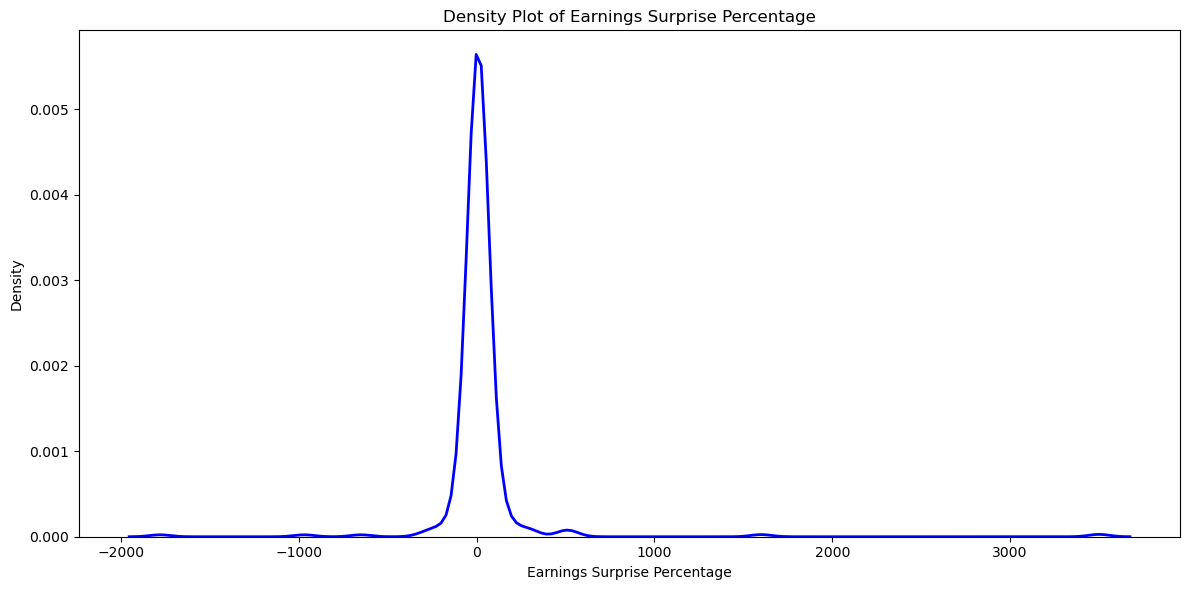

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the 'surprisePercentage' column is numeric (convert if necessary)
combined_data['surprisePercentage'] = pd.to_numeric(combined_data['surprisePercentage'], errors='coerce')

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a density plot (KDE) using seaborn
sns.kdeplot(combined_data['surprisePercentage'], color='blue', linewidth=2)

# Set title and labels
plt.title('Density Plot of Earnings Surprise Percentage')
plt.xlabel('Earnings Surprise Percentage')
plt.ylabel('Density')

# Remove gridlines
plt.grid(False)

# Add some padding to make sure everything is visible
plt.tight_layout()

# Show the plot
plt.show()
plt.savefig('percentag')


In [32]:
combined_data['surprisePercentage'].min()

'-0.8'